In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data
df_clean = pd.read_csv('overall.csv')

In [3]:
#Check data
df_clean.head()

,selftext,Python
0,hey python friends last couple weeks months us...,1
1,5 b 11 question beginner python value b change...,1
2,anyone give direction code python script copie...,1
3,today decided make tensorflow stuffs python us...,1
4,hi guys found packages explanation fp growth a...,1


In [4]:
#Check shape
df_clean.shape

(10000, 2)

In [5]:
#Check if there's missing
df_clean.isna().sum()

selftext    0
Python      0
dtype: int64

In [6]:
#Check is there's missing
df_clean[df_clean['selftext'].isna()]

,selftext,Python


In [7]:
#Check if any 'title' == 'Python'
df_clean[df_clean['selftext'] == 'Python']

,selftext,Python


In [8]:
#Split data (Train Test Split)
X = df_clean['selftext']
y = df_clean['Python']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
#Count Vectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
cvec = CountVectorizer(min_df=50)
#Min_df stands for minimum document frequency
#document frequency counts the number of documents in the dataset (aka rows or entries) that have the particular word.
cvec.fit(X_train)

CountVectorizer(min_df=50)

In [10]:
#Transform Data
words = cvec.transform(X_train)
words = pd.DataFrame(words.toarray(), columns=cvec.get_feature_names())
words

,00,000,01,02,03,04,05,06,07,08,...,wrote,www,x200b,year,years,yes,yet,youtu,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,2,1,0,...,0,0,4,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#1 if Python, else SQL
words['subreddit'] = y_train.map(lambda x: 'Python' if x == 1 else 'SQL').values
words.head()

,00,000,01,02,03,04,05,06,07,08,...,wrote,www,x200b,year,years,yes,yet,youtu,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,2,1,0,...,0,0,4,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [12]:
#Check if there are rows that are 'python'
words[words['title'] == 'python']

,00,000,01,02,03,04,05,06,07,08,...,wrote,www,x200b,year,years,yes,yet,youtu,youtube,zero


In [13]:
#Check if there are columns that are 'python'
words['python']

0       0
1       0
2       0
3       0
4       6
       ..
7495    0
7496    1
7497    1
7498    0
7499    0
Name: python, Length: 7500, dtype: int64

In [14]:
#Drop columns = Python
words = words.drop(columns = ['python'])

In [15]:
#Check shape
words.shape

(7500, 1157)

In [16]:
#drop columns that are numeric; creating words2
words2 = words.drop(columns=[col for col in words.columns if col.isnumeric()])
words2.shape
#Columns reduced from 792 to 766

(7500, 1116)

In [17]:
#Check the column headers
words2.columns

Index(['_date', '_id', '_name', 'ability', 'able', 'access', 'according',
       'account', 'achieve', 'across',
       ...
       'wrote', 'www', 'x200b', 'year', 'years', 'yes', 'yet', 'youtu',
       'youtube', 'zero'],
      dtype='object', length=1116)

In [18]:
#import
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
# top 50 words in titles from the Rprogram subreddit
top_SQL = words2.loc[words2['subreddit'] == 'SQL', :'first'].sum().sort_values(ascending=False)[:50]
#zsendokame is the last column
top_SQL

amp            3106
data           2355
date           1217
database       1212
column         1129
com             942
create          878
_id             751
code            751
count           726
end             712
columns         616
case            607
first           591
error           584
could           552
also            527
example         524
find            482
add             445
db              430
different       425
anyone          418
_date           389
day             382
else            379
auto            372
every           365
customer        344
etc             339
appreciated     327
dbo             323
file            305
able            302
company         302
best            293
created         287
employee        277
even            277
another         274
course          268
advance         264
field           259
currently       253
customers       234
better          232
excel           231
amount          220
_name           218
everyone        217


In [20]:
#Save the top 50 in a dataframe
top_SQL_df = pd.DataFrame(top_SQL)
top_SQL_df.rename(columns={0:'SQL'}, inplace=True)
top_SQL_df

,SQL
amp,3106
data,2355
date,1217
database,1212
column,1129
com,942
create,878
_id,751
code,751
count,726


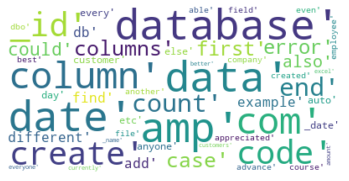

In [21]:
wordcloudSQL = WordCloud(max_font_size=50, background_color='white').generate(str(list(top_SQL.index)))

plt.imshow(wordcloudSQL, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# top 50 words in titles from the Rprogram subreddit
top_python = words2.loc[words2['subreddit'] == 'Python', :'first'].sum().sort_values(ascending=False)[:50]
#Use 31 because there's python. will have to drop it later. 
#zip is the last column
top_python

com            5527
amp            2750
code           1698
data           1061
also            761
file            719
first           556
english         524
find            495
choice          449
auto            443
create          443
could           442
app             432
api             431
def             405
check           396
course          383
files           382
example         379
feedback        346
anyone          341
else            336
bot             326
class           310
even            300
created         288
blog            284
build           282
better          262
discord         262
best            255
add             254
application     254
easy            242
en              241
different       241
based           234
every           232
coding          231
everyone        228
etc             223
blob            222
django          218
feel            210
anything        209
features        207
answer          205
comments        205
around          203


In [23]:
#Save the top 50 in a dataframe
top_python_df = pd.DataFrame(top_python)
top_python_df.rename(columns={0:'Python'}, inplace=True)
top_python_df

,Python
com,5527
amp,2750
code,1698
data,1061
also,761
file,719
first,556
english,524
find,495
choice,449


In [24]:
#Check Shape
top_SQL_df.shape, top_python_df.shape

((50, 1), (50, 1))

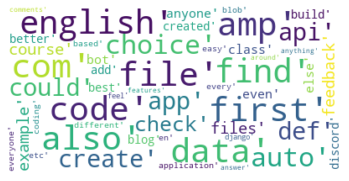

In [25]:
wordcloudPython = WordCloud(max_font_size=40, background_color='white').generate(str(list(top_python.index)))

plt.imshow(wordcloudPython, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Creating a list of the most common words; drop all words except 1 to 31. Keeping 31 because have to remove 'Python'
most_common = list(words2.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:50].index)
most_common

['https',
 'com',
 'amp',
 'sql',
 'table',
 'data',
 'github',
 'like',
 'x200b',
 'would',
 'select',
 'code',
 'gt',
 'using',
 'use',
 'one',
 'get',
 'id',
 'want',
 'query',
 'time',
 'name',
 'know',
 'need',
 'new',
 'project',
 'help',
 'html',
 'png',
 'join',
 'date',
 'database',
 'create',
 'www',
 'also',
 'null',
 'work',
 'column',
 'way',
 'values',
 'first',
 'make',
 'lt',
 'trying',
 'print',
 'file',
 'number',
 'insert',
 'user',
 'could']

In [27]:
#Groupby the sum of occurance
words2.groupby('subreddit').sum()

,_date,_id,_name,ability,able,access,according,account,achieve,across,...,wrote,www,x200b,year,years,yes,yet,youtu,youtube,zero
subreddit,,,,,,,,,,,,,,,,,,,,,
Python,2,6,9,33,191,118,29,92,21,58,...,158,1019,1023,187,149,54,91,391,639,39
SQL,389,751,218,22,302,166,40,150,65,87,...,51,299,1789,369,166,101,69,8,45,47


In [28]:
#Groupby based on the list [mostcommon]
common_df = words.groupby('subreddit').sum()[most_common].T.sort_values(by='SQL', ascending=False)

In [29]:
#Check the dataframe
common_df.head(2)

subreddit,Python,SQL
sql,85,3384
table,92,3365


In [30]:
# Creating columns of totals and percentages
common_df['total'] = common_df['SQL'] + common_df['Python']
common_df['%SQL'] = common_df['SQL'] / common_df['total']
common_df['%python'] = common_df['Python'] / common_df['total']

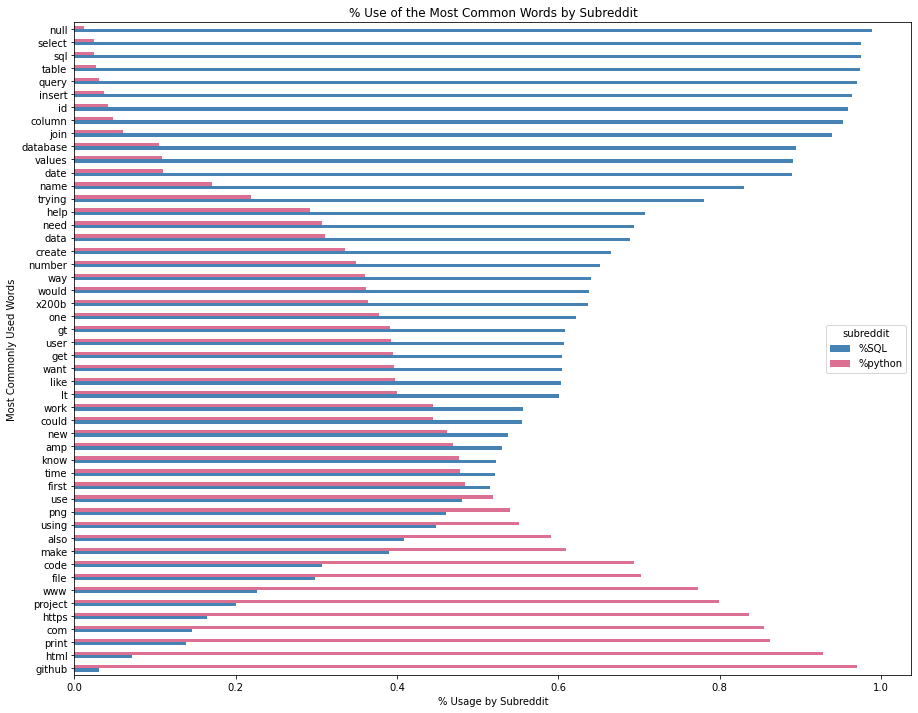

In [31]:
# Creating a chart showing the % uses of the most common words
ax = common_df[['%SQL', '%python']].sort_values(by='%SQL').plot(kind='barh', figsize=(15,12), color = {'%SQL':'steelblue', '%python':'palevioletred'})
ax.set_xlabel('% Usage by Subreddit')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('% Use of the Most Common Words by Subreddit');

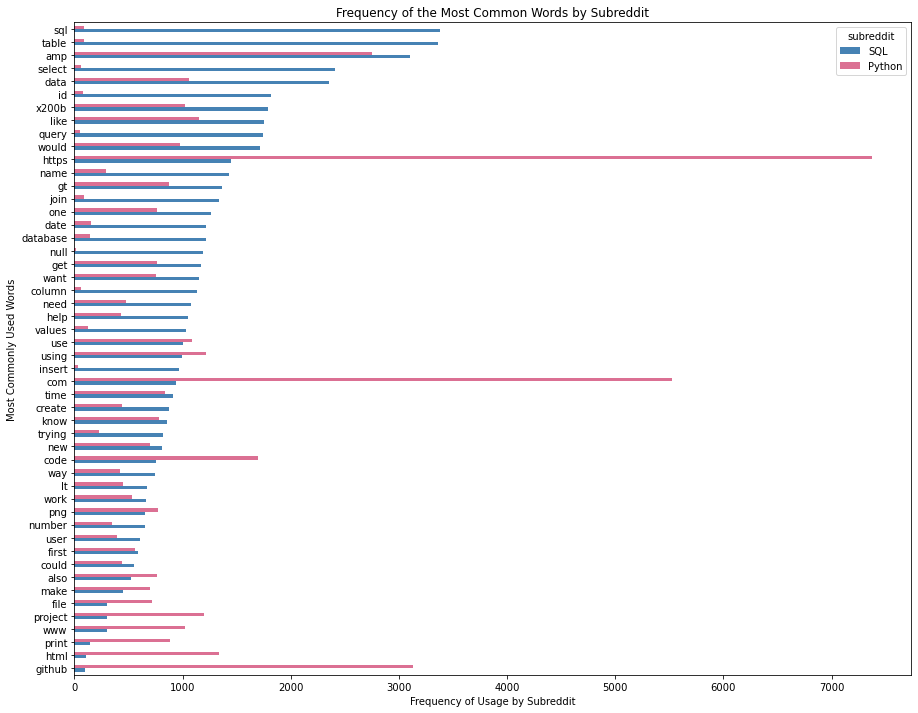

In [32]:
# Creating a chart showing the frequency of uses of the most common words
ax = common_df[['SQL', 'Python']].sort_values(by='SQL').plot(kind='barh', figsize=(15,12), color = {'SQL':'steelblue', 'Python':'palevioletred'})
ax.set_xlabel('Frequency of Usage by Subreddit')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('Frequency of the Most Common Words by Subreddit');

In [33]:
# transposing the groupby dataframe in order to be able to sort by subreddit more easily
group = words.groupby('subreddit').sum().T

In [34]:
# words used most in Python that are not used in R
group[group['SQL'] == 0].sort_values(by='SQL', ascending=False).head(5)

subreddit,Python,SQL
pygame,152,0
pypi,254,0
selenium,101,0
tkinter,138,0


In [35]:
# words used most in R that are not used in Python
group[group['Python'] == 0].sort_values(by='Python', ascending=False).head(5)

subreddit,Python,SQL
clause,0,154
cte,0,134
ssms,0,77
subquery,0,104
table1,0,195


# Inverse Data Frequency (IDF)

In [36]:
#Inverse Data Frequency (IDF)
#Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used. 
#The more frequent its usage across documents, the lower its score. 
#The lower the score, the less important the word becomes.

In [37]:
tvec = TfidfVectorizer(min_df=3)
words2 = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                      columns=tvec.get_feature_names())
words2['subreddit'] = y_train.map(lambda x: 'Python' if x == 1 else 'SQL').values
words2.head()

,00,000,0000,00000,001,002,003,004,005,00933,...,zeroes,zeros,zerotomastery,zip,zipcode,zone,zoo,zoom,zt,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Check columns with 'python'
words2['python']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.203479
          ...   
7495    0.000000
7496    0.074517
7497    0.045437
7498    0.000000
7499    0.000000
Name: python, Length: 7500, dtype: float64

In [39]:
#Drop 'python'
words2 = words2.drop(columns = ['python'])

In [40]:
#Sort
#words2.loc[words['subreddit'] == 'R', :'zz'].sum().sort_values(ascending=False)[:50]

In [41]:
words2.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:50]

https       310.732188
amp         249.421665
com         243.555842
github      192.239269
sql         188.537524
table       152.017963
data        151.576822
would       133.992862
like        132.577768
code        121.445454
x200b       120.558124
use         116.264134
using       112.444586
want        106.119328
select      103.604304
png         103.434198
know        103.207109
project      99.333371
one          99.043026
get          97.664183
help         95.715822
query        93.822419
need         92.083658
id           91.620409
new          86.652960
database     85.666468
www          85.559074
time         82.838903
column       79.076237
gt           74.907245
thanks       73.739032
hi           73.003321
create       72.968366
learn        72.891604
make         70.729220
name         70.707967
work         70.291635
way          69.221768
learning     67.400880
join         67.332771
anyone       66.819928
youtube      66.703516
also         66.571020
date       

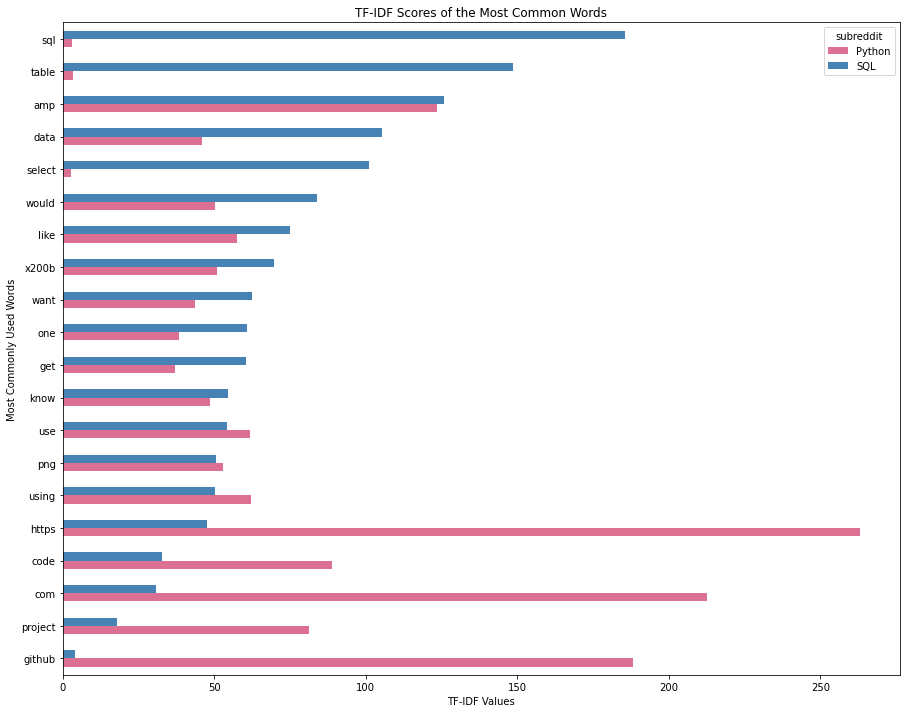

In [42]:
# Create a list of the most common words
most_common2 = list(words2.drop('subreddit', axis=1).sum().sort_values(ascending=False)[:20].index)

# Filter the dataframe to create a dataframe of just the most common words
common_df2 = words2.groupby('subreddit').sum()[most_common2].T.sort_values(by='SQL', ascending=False)

# Create columns of totals and percentages
common_df2['total'] = common_df2['Python'] + common_df2['SQL']
common_df2['%Python'] = common_df2['Python'] / common_df2['total']
common_df2['%SQL'] = common_df2['SQL'] / common_df2['total']

# Create a chart showing the relative uses of the most common words
ax = common_df2[['Python','SQL']].sort_values(by='SQL').plot(kind='barh', figsize=(15,12), color = {'SQL':'steelblue', 'Python':'palevioletred'})
ax.set_xlabel('TF-IDF Values')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('TF-IDF Scores of the Most Common Words');

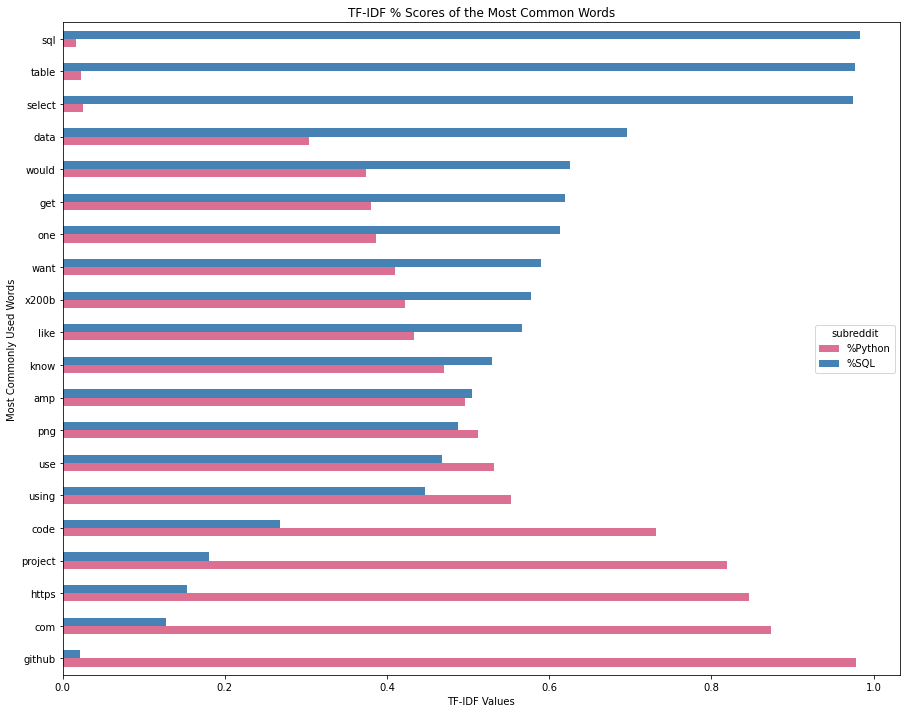

In [43]:
# Create a chart showing the relative uses of the most common words
ax = common_df2[['%Python','%SQL']].sort_values(by='%SQL').plot(kind='barh', figsize=(15,12), color = {'%SQL':'steelblue', '%Python':'palevioletred'})
ax.set_xlabel('TF-IDF Values')
ax.set_ylabel('Most Commonly Used Words')
ax.set_title('TF-IDF % Scores of the Most Common Words');